# CAPSTONE PROJECT NOTES

### NAME: ANEETA ANN JOHN
### BATCH: PGP DSBA ONLINE DEC_C 2021

In [1]:
# CUSTOMER CHURN ANALYSIS

In [2]:
# EDA

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_excel('Customer Churn Data.xlsx')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [7]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [8]:
df.shape

(11260, 19)

In [9]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [12]:
df.duplicated().any()

False

In [13]:
# WE CAN DROP ACCOUNT ID VARIABLE

In [14]:
df = df.drop(['AccountID'], axis = 1)

In [15]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [16]:
df.shape

(11260, 18)

In [17]:
# ANOMALY TREATMENT. CONVERTING ANOMALIES INTO NULL VALUES(NaN)

In [18]:
df.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [19]:
df.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [20]:
# There are 116 '#' values in the tenure column. Converting into NaN 

In [21]:
df["Tenure"] = df["Tenure"].replace("#", np.NaN)

In [22]:
df.City_Tier.value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [23]:
df.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [24]:
df.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [25]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

In [26]:
df.Gender.value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [27]:
df.Service_Score.value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [28]:
df.Account_user_count.value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [29]:
df["Account_user_count"] = df["Account_user_count"].replace("@", np.NaN)

In [30]:
df.Account_user_count.value_counts()

4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: Account_user_count, dtype: int64

In [31]:
df.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [32]:
df["account_segment"] = df["account_segment"].replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

In [33]:
df.account_segment.value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [34]:
df.CC_Agent_Score.value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [35]:
df.Marital_Status.value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [36]:
df.rev_per_month.value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [37]:
df["rev_per_month"] = df["rev_per_month"].replace("+", np.NaN)

In [38]:
df.rev_per_month.value_counts()

3.0      1746
2.0      1585
5.0      1337
4.0      1218
6.0      1085
7.0       754
8.0       643
9.0       564
10.0      413
1.0       402
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
102.0       8
124.0       5
107.0       5
123.0       5
140.0       4
118.0       4
129.0       4
133.0       4
136.0       4
117.0       3
108.0       3
101.0       3
116.0       3
110.0       3
137.0       3
119.0       3
115.0       3
138.0       3
130.0       3
126.0       3
113.0       3
127.0       3
19.0        2
139.0       2
120.0       2
131.0       2
22.0        2
125.0       2
121.0       2
105.0       2
114.0       2
134.0       2
20.0        1
23.0        1
122.0       1
104.0       1
21.0        1
25.0        1
135.0       1
111.0       1
109.0       1
100.0       1
103.0       1
Name: rev_per_month, dtype: int64

In [39]:
df.Complain_ly.value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [40]:
df.rev_growth_yoy.value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [41]:
df["rev_growth_yoy"] = df["rev_growth_yoy"].replace("$", np.NaN)

In [42]:
df.rev_growth_yoy.value_counts()

14.0    1524
13.0    1427
15.0    1283
12.0    1210
16.0     949
18.0     708
17.0     704
19.0     619
20.0     562
11.0     523
21.0     433
22.0     403
23.0     345
24.0     229
25.0     188
26.0      98
27.0      35
28.0      14
4.0        3
Name: rev_growth_yoy, dtype: int64

In [43]:
df.coupon_used_for_payment.value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [44]:
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].replace("#", np.NaN).replace("$", np.NaN).replace("*", np.NaN)

In [45]:
df.coupon_used_for_payment.value_counts()

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

In [46]:
df.Day_Since_CC_connect.value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [47]:
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].replace("$", np.NaN)

In [48]:
df.Day_Since_CC_connect.value_counts()

3.0     1816
2.0     1574
1.0     1256
8.0     1169
0.0      964
7.0      911
4.0      893
9.0      622
5.0      479
10.0     339
6.0      229
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
16.0      26
18.0      26
30.0       2
31.0       2
47.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

In [49]:
df.cashback.value_counts() ### $ (2), 

155.62                10
149.36                 9
154.73                 9
145.08                 9
149.68                 9
152.28                 9
148.42                 8
154.1                  8
130.72                 8
153.04                 8
148.77                 8
128.19                 8
165                    8
123.41999999999999     8
152.07                 8
161.62                 7
162.6                  7
149.78                 7
193.04                 7
124.50999999999999     7
148.8                  7
149.04                 7
124.03999999999999     7
154.6                  7
154.67                 7
129.36                 7
180.62                 7
152.06                 7
174.36                 7
151.1                  7
148.4                  7
150.59                 7
161.42                 7
163.97                 7
155.38                 7
152.04                 7
146.27                 7
188.47                 7
149.07                 7
154.72                 7


In [50]:
df["cashback"] = df["cashback"].replace("$", np.NaN)

In [51]:
df.cashback.value_counts()

155.62     10
145.08      9
149.36      9
154.73      9
152.28      9
149.68      9
123.42      8
153.04      8
165.00      8
128.19      8
154.10      8
148.42      8
152.07      8
148.77      8
130.72      8
154.67      7
155.38      7
124.04      7
200.96      7
148.40      7
152.04      7
152.06      7
154.72      7
154.60      7
193.04      7
146.27      7
150.59      7
163.97      7
149.07      7
180.62      7
129.36      7
148.80      7
124.51      7
149.04      7
188.47      7
151.10      7
162.60      7
161.42      7
174.36      7
149.78      7
161.62      7
144.40      6
196.19      6
152.41      6
127.41      6
147.74      6
120.44      6
132.94      6
148.76      6
150.42      6
126.57      6
148.23      6
146.32      6
158.10      6
146.77      6
172.24      6
166.48      6
155.72      6
123.80      6
127.28      6
150.87      6
150.00      6
186.42      6
126.10      6
134.52      6
153.32      6
161.79      6
166.87      6
129.42      6
164.04      6
153.36      6
156.72

In [52]:
df.cashback.astype('float')

0         159.93
1         120.90
2            NaN
3         134.07
4         129.60
5         139.19
6         120.86
7         122.93
8         126.83
9         122.93
10        295.45
11        153.81
12        134.41
13        133.88
14        196.19
15        120.73
16        129.26
17        157.44
18        160.74
19        149.63
20        161.72
21        203.12
22        116.75
23           NaN
24        206.50
25        142.00
26        172.95
27        123.06
28        123.48
29        189.98
30        143.19
31       1974.00
32        133.46
33        208.55
34        122.31
35        123.23
36        120.24
37        127.13
38        194.39
39        125.66
40        299.26
41        124.51
42        194.19
43        186.86
44        130.38
45        130.58
46        123.25
47        120.88
48        130.72
49        150.06
50        142.57
51        125.00
52        111.02
53        204.53
54        122.88
55        139.29
56        123.11
57        131.40
58           N

In [53]:
df.Login_device.value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [54]:
df["Login_device"] = df["Login_device"].replace("&&&&", np.NaN)

In [55]:
df.Login_device.value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

In [56]:
# NULL VALUE TREATMENT

In [57]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [58]:
df.isnull().sum().sum()

4361

In [59]:
print('PERCENT OF MISSING VALUES TO THE WHOLE DATA --->')
print('')
round(df.isna().sum()*100/df.shape[0], 2)

PERCENT OF MISSING VALUES TO THE WHOLE DATA --->



Churn                      0.00
Tenure                     1.94
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Service_Score              0.87
Account_user_count         3.94
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              7.02
Complain_ly                3.17
rev_growth_yoy             0.03
coupon_used_for_payment    0.03
Day_Since_CC_connect       3.18
cashback                   4.20
Login_device               6.75
dtype: float64

In [60]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 2.15 %


In [61]:
#Checking Zero Values

In [62]:
(df.drop(['Churn','Complain_ly'], axis=1)==0).sum().sort_values(ascending=False)

coupon_used_for_payment    2150
Tenure                     1231
Day_Since_CC_connect        964
Service_Score                 8
cashback                      4
City_Tier                     0
CC_Contacted_LY               0
Payment                       0
Gender                        0
Account_user_count            0
account_segment               0
CC_Agent_Score                0
Marital_Status                0
rev_per_month                 0
rev_growth_yoy                0
Login_device                  0
dtype: int64

In [63]:
round(((df.drop(['Churn','Complain_ly'], axis=1)==0).sum())*100/df.shape[0], 2).sort_values(ascending=False)

coupon_used_for_payment    19.09
Tenure                     10.93
Day_Since_CC_connect        8.56
Service_Score               0.07
cashback                    0.04
City_Tier                   0.00
CC_Contacted_LY             0.00
Payment                     0.00
Gender                      0.00
Account_user_count          0.00
account_segment             0.00
CC_Agent_Score              0.00
Marital_Status              0.00
rev_per_month               0.00
rev_growth_yoy              0.00
Login_device                0.00
dtype: float64

In [64]:
((df.drop(['Churn','Complain_ly'], axis=1)==0).sum().sum())*100/df.drop('Churn', axis=1).size

2.2761466931355137

In [65]:
# Variables with 0 seems to be valid. SO NOT DROPPING OBSERVATIONS WITH ZERO

In [66]:
# Dropping Variables with zeros greater than 30%

In [67]:
# df.drop([], axis=1, inplace=True)
# df.shape

In [68]:
# # determining the name of the file
# file_name = 'customernull.xlsx'
  
# # saving the excel
# df.to_excel(file_name)
# print('DataFrame is written to Excel File successfully.')

In [69]:
#Visualising Missing Values

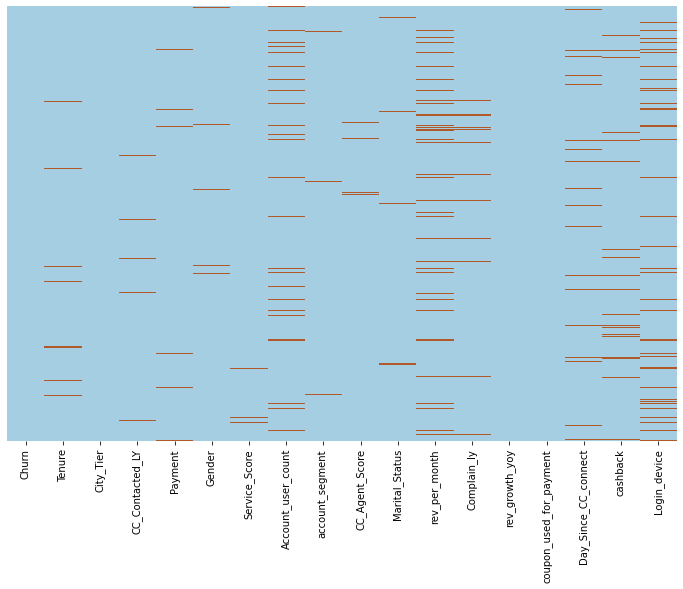

In [70]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Paired', yticklabels = False)
# plt.savefig('missing_vis.jpg', bbox_inches='tight');
plt.show();

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [72]:
# NULL VALUE TREATMENT FOR CATEGORICAL VARIABLES

In [73]:
# IMPUTING WITH MODE

In [74]:
# Payment, Gender, account_segment, Marital_Status, Login_device 

In [75]:
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])

In [76]:
df.Payment.value_counts()

Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [77]:
df.Payment.isnull().sum()

0

In [78]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [79]:
df.Gender.value_counts()

Male      6812
Female    4448
Name: Gender, dtype: int64

In [80]:
df.Gender.isnull().sum()

0

In [81]:
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])

In [82]:
df.account_segment.value_counts()

Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [83]:
df.account_segment.isnull().sum()

0

In [84]:
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [85]:
df.Marital_Status.value_counts()

Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [86]:
df.Marital_Status.isnull().sum()

0

In [87]:
df['Login_device'] = df['Login_device'].fillna(df['Login_device'].mode()[0])

In [88]:
df.Login_device.value_counts()

Mobile      8242
Computer    3018
Name: Login_device, dtype: int64

In [89]:
df.Login_device.isnull().sum()

0

In [90]:
# NULL VALUE TREATMENT FOR CONTINUOUS VARIABLES IMPUTING WITH MEDIAN

In [91]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         444
account_segment              0
CC_Agent_Score             116
Marital_Status               0
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device                 0
dtype: int64

In [92]:
df.City_Tier.value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [93]:
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mode()[0])

In [94]:
df.City_Tier.value_counts()

1.0    7375
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [95]:
df.City_Tier.isnull().sum()

0

In [96]:
df.Service_Score.value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [97]:
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mode()[0])

In [98]:
df.Service_Score.value_counts()

3.0    5588
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [99]:
df.Service_Score.isnull().sum()

0

In [100]:
df.CC_Agent_Score.value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [101]:
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0])

In [102]:
df.CC_Agent_Score.value_counts()

3.0    3476
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [103]:
df.CC_Agent_Score.isnull().sum()

0

In [104]:
df.Complain_ly.value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [105]:
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mode()[0])

In [106]:
df.Complain_ly.isnull().sum()

0

In [107]:
df.coupon_used_for_payment.value_counts()

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

In [108]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].mode()[0])

In [109]:
df.coupon_used_for_payment.value_counts()

1.0     4376
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

In [110]:
df.coupon_used_for_payment.isnull().sum()

0

In [111]:
df.Account_user_count.value_counts()

4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: Account_user_count, dtype: int64

In [112]:
df['Account_user_count'] = df['Account_user_count'].fillna(df['Account_user_count'].mode()[0])

In [113]:
df.Account_user_count.value_counts()

4.0    5013
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: Account_user_count, dtype: int64

In [114]:
df.Tenure.value_counts()

1.0     1351
0.0     1231
8.0      519
9.0      496
7.0      450
10.0     423
3.0      410
5.0      403
4.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
30.0     137
28.0     137
99.0     131
27.0     131
26.0     122
25.0     114
29.0     114
31.0      96
50.0       2
60.0       2
51.0       2
61.0       2
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Tenure'>

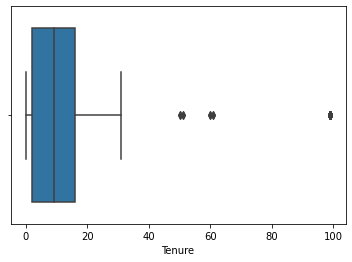

In [115]:
sns.boxplot(x=df['Tenure'])

In [116]:
df['Tenure'].median()

9.0

In [117]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [118]:
df.Tenure.value_counts()

1.0     1351
0.0     1231
9.0      714
8.0      519
7.0      450
10.0     423
3.0      410
5.0      403
4.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
30.0     137
28.0     137
99.0     131
27.0     131
26.0     122
25.0     114
29.0     114
31.0      96
50.0       2
60.0       2
51.0       2
61.0       2
Name: Tenure, dtype: int64

In [119]:
df.Tenure.isnull().sum()

0

<AxesSubplot:xlabel='CC_Contacted_LY'>

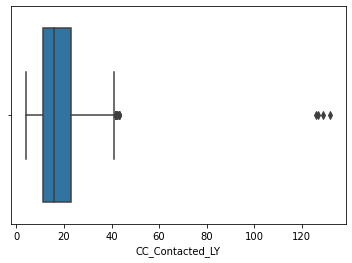

In [120]:
sns.boxplot(x=df['CC_Contacted_LY'])

In [121]:
df['CC_Contacted_LY'].median()

16.0

In [122]:
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median())

In [123]:
df.CC_Contacted_LY.isnull().sum()

0

<AxesSubplot:xlabel='rev_per_month'>

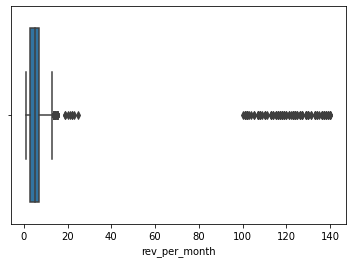

In [124]:
sns.boxplot(x=df['rev_per_month'])

In [125]:
df['rev_per_month'].median()

5.0

In [126]:
df['rev_per_month'] = df['rev_per_month'].fillna(df['rev_per_month'].median())

In [127]:
df.rev_per_month.isnull().sum()

0

<AxesSubplot:xlabel='cashback'>

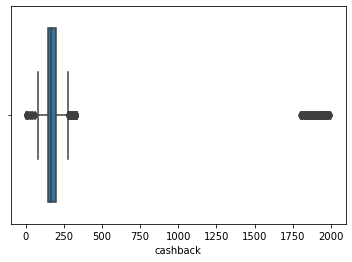

In [128]:
sns.boxplot(x=df['cashback'])

In [129]:
df['cashback'].median()

165.25

In [130]:
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [131]:
df.rev_per_month.isnull().sum()

0

In [132]:
# In DAYS SINCE CC CONNECT, THE NULL VALUES COULD BE ZERO. HENCE IMPUTING WITH ZERO.

In [133]:
df.Day_Since_CC_connect.value_counts()

3.0     1816
2.0     1574
1.0     1256
8.0     1169
0.0      964
7.0      911
4.0      893
9.0      622
5.0      479
10.0     339
6.0      229
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
16.0      26
18.0      26
30.0       2
31.0       2
47.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

In [134]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace(np.NaN, 0.0)

In [135]:
df.Day_Since_CC_connect.value_counts()

3.0     1816
2.0     1574
0.0     1322
1.0     1256
8.0     1169
7.0      911
4.0      893
9.0      622
5.0      479
10.0     339
6.0      229
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
16.0      26
18.0      26
30.0       2
31.0       2
47.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

In [136]:
df.rev_growth_yoy.value_counts()

14.0    1524
13.0    1427
15.0    1283
12.0    1210
16.0     949
18.0     708
17.0     704
19.0     619
20.0     562
11.0     523
21.0     433
22.0     403
23.0     345
24.0     229
25.0     188
26.0      98
27.0      35
28.0      14
4.0        3
Name: rev_growth_yoy, dtype: int64

In [137]:
df['rev_growth_yoy'].median()

15.0

In [138]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [139]:
df.rev_growth_yoy.value_counts()

14.0    1524
13.0    1427
15.0    1286
12.0    1210
16.0     949
18.0     708
17.0     704
19.0     619
20.0     562
11.0     523
21.0     433
22.0     403
23.0     345
24.0     229
25.0     188
26.0      98
27.0      35
28.0      14
4.0        3
Name: rev_growth_yoy, dtype: int64

In [140]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [141]:
# UNIVARIATE ANALYSIS

In [142]:
# BOXPLOT

<AxesSubplot:>

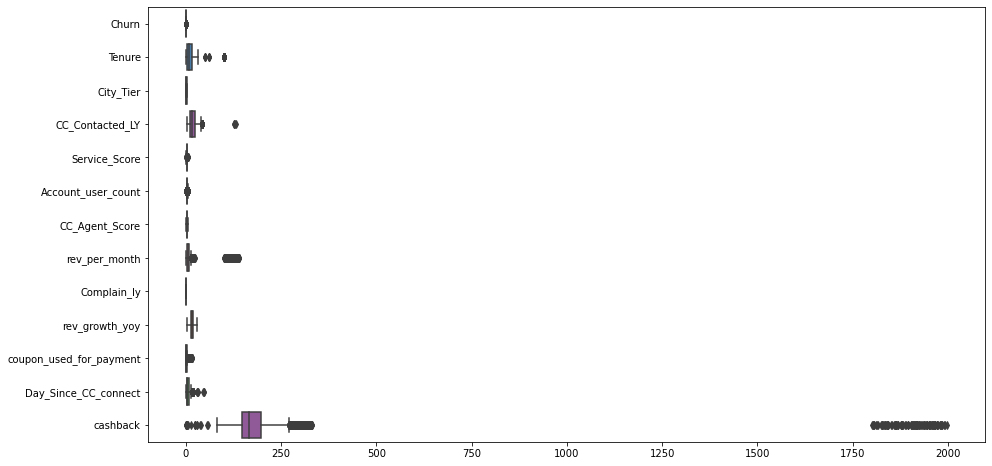

In [143]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient="h", palette="Set1")

<AxesSubplot:>

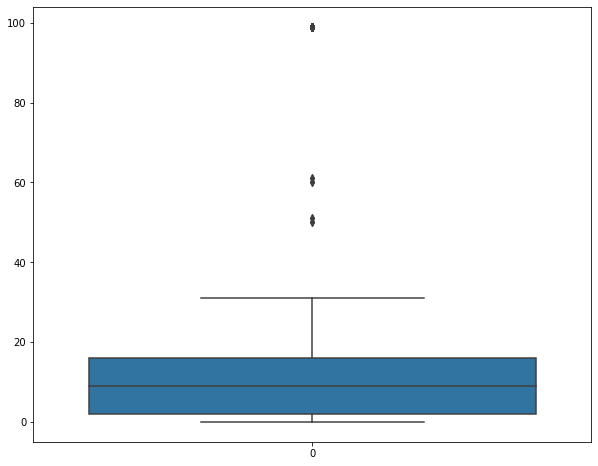

In [144]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df['Tenure'])

<AxesSubplot:>

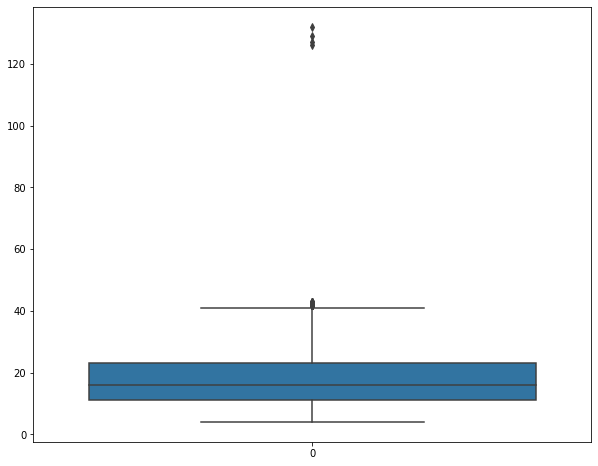

In [145]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df['CC_Contacted_LY'])

<AxesSubplot:>

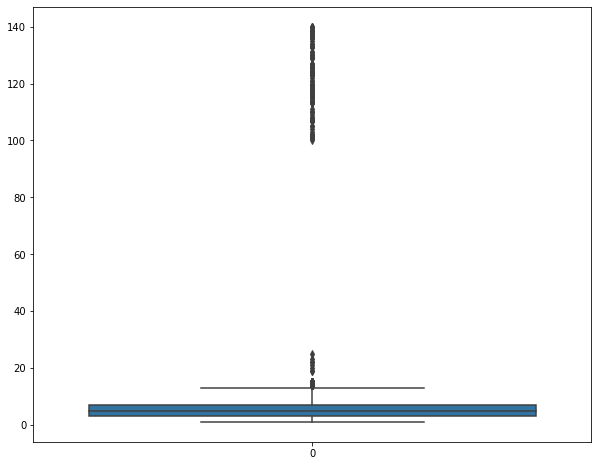

In [146]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df['rev_per_month'])

<AxesSubplot:>

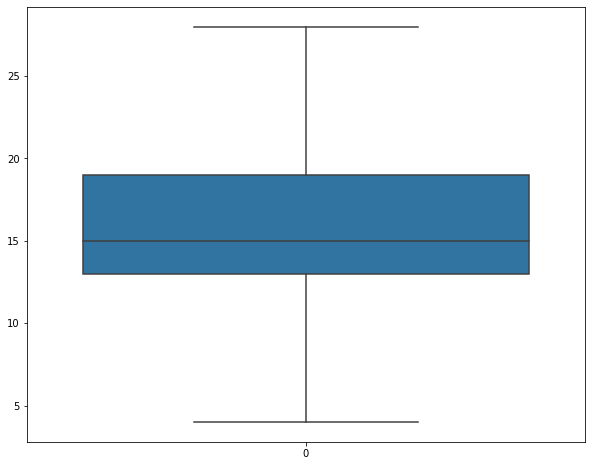

In [147]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df['rev_growth_yoy'])

<AxesSubplot:>

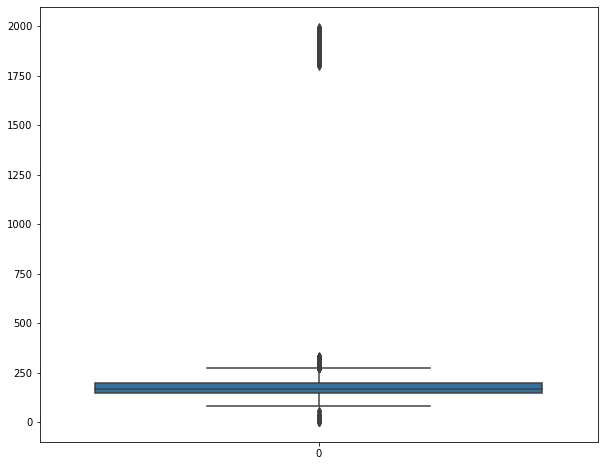

In [148]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df['cashback'])

In [149]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [150]:
# DENSITY PLOT AND HISTOGRAM

In [151]:
df_num = df[['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']]

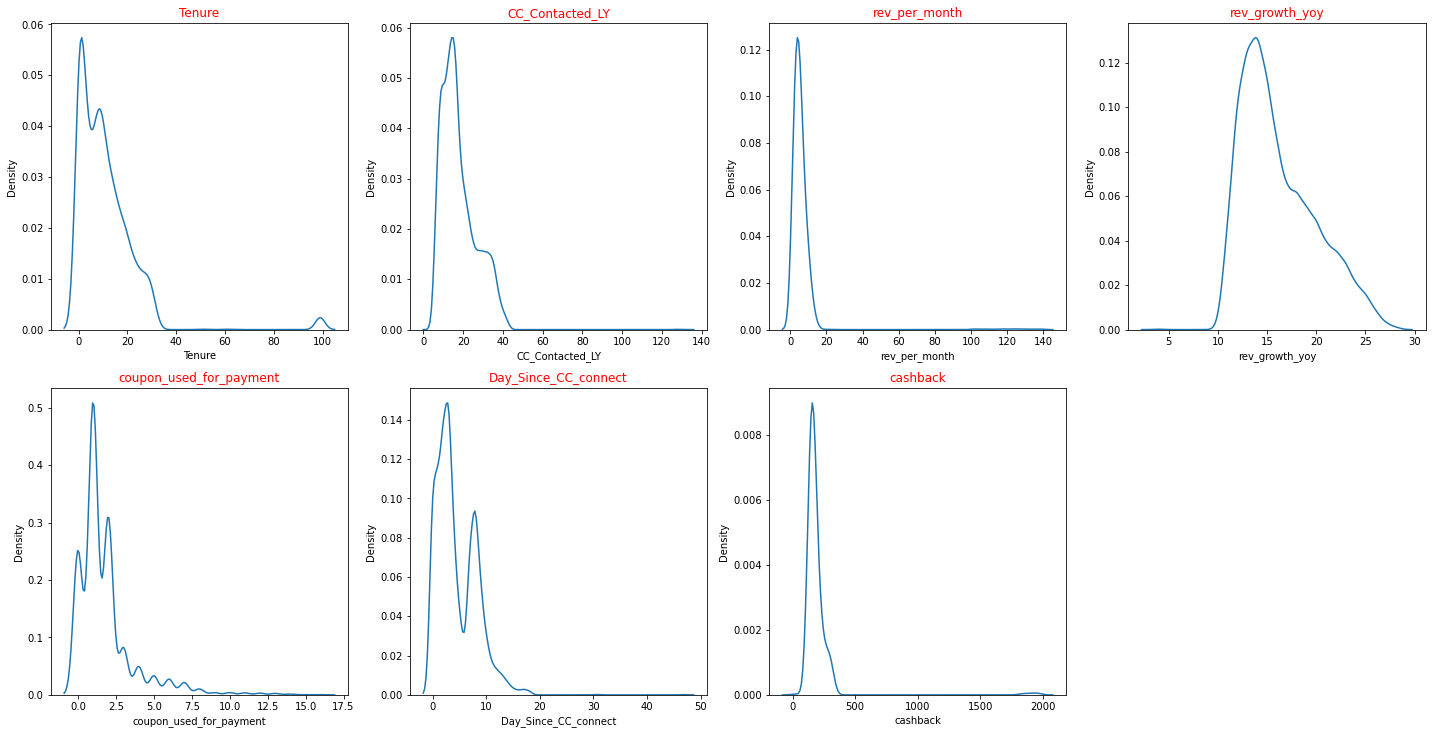

In [152]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df_num.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df_num[df_num.columns[i]],hist=False)
    ax.set_title(df_num.columns[i],color='Red')
plt.tight_layout()
plt.show()

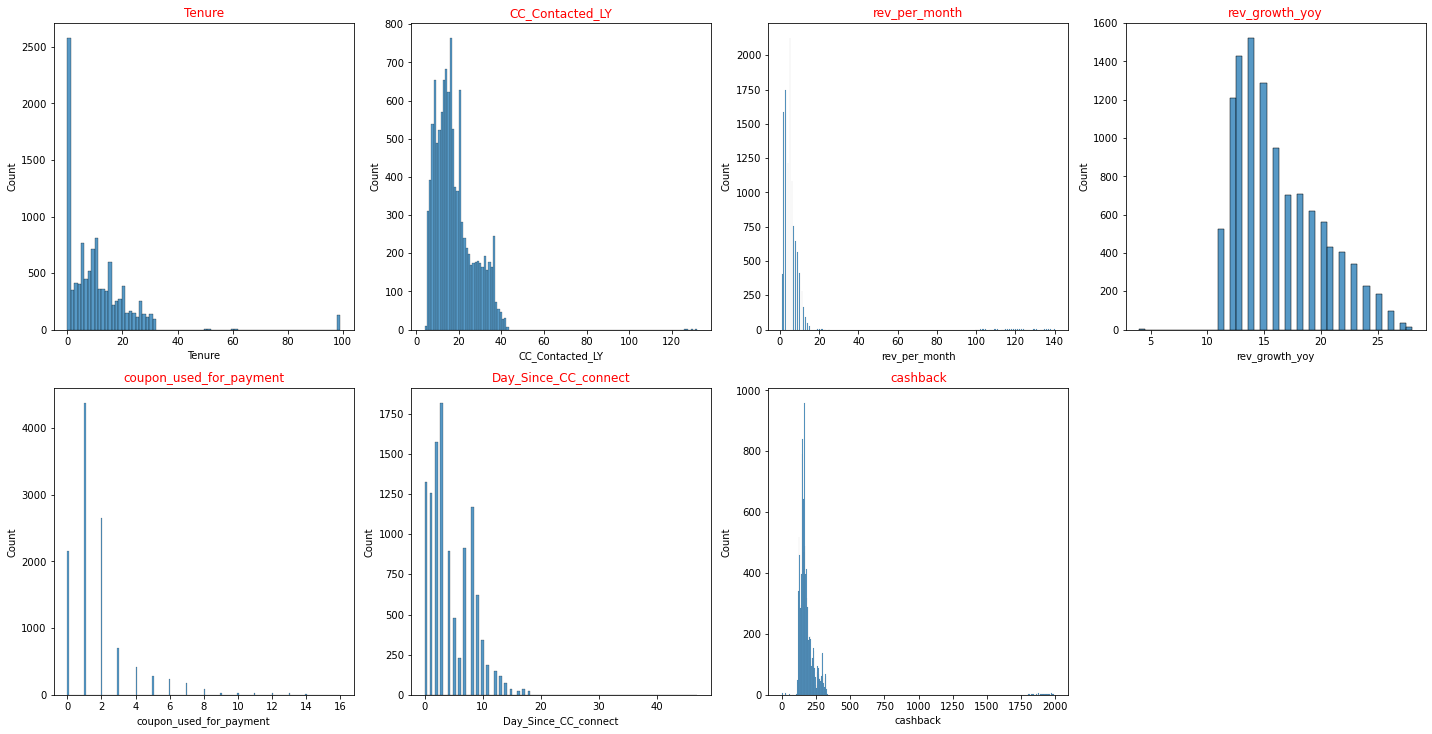

In [153]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df_num.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.histplot(df_num[df_num.columns[i]])
    ax.set_title(df_num.columns[i],color='Red')
plt.tight_layout()
plt.show()

In [154]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [155]:
# City_Tier, Service_Score, Account_user_count, CC_Agent_Score, Complain_ly, Churn
# Payment, Gender, account_segment, Marital_Status, Login_device

In [156]:
df['City_Tier'] = df['City_Tier'].astype(int)
df['Service_Score'] = df['Service_Score'].astype(int)
df['Account_user_count'] = df['Account_user_count'].astype(int)
df['CC_Agent_Score'] = df['CC_Agent_Score'].astype(int)

In [157]:
df['Complain_ly'] = df['Complain_ly'].astype(int)
df.Complain_ly.value_counts()

0    8149
1    3111
Name: Complain_ly, dtype: int64

In [158]:
df.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [159]:
# BIVARIATE ANALYSIS

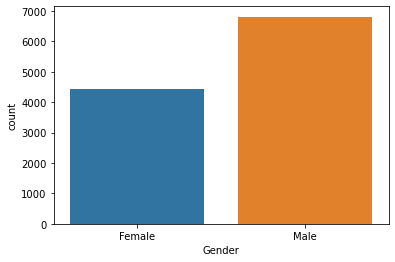

In [160]:
sns.countplot(x='Gender',data=df)
plt.show()

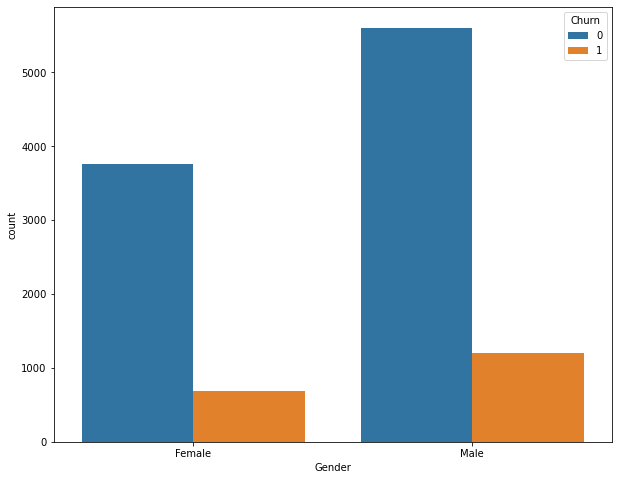

In [161]:
plt.figure(figsize = (10,8))
sns.countplot(x='Gender',hue='Churn',data=df)
plt.show();

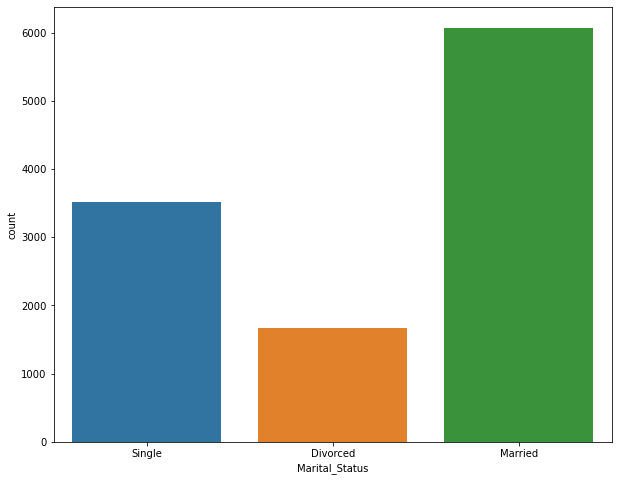

In [162]:
plt.figure(figsize = (10,8))
sns.countplot(x='Marital_Status',data=df)
plt.show();

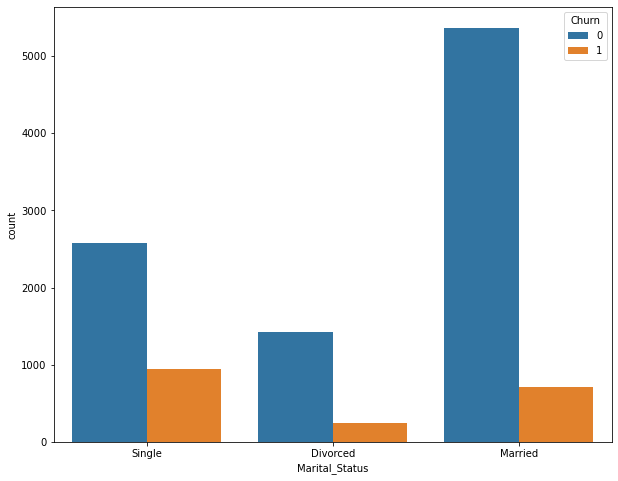

In [163]:
plt.figure(figsize = (10,8))
sns.countplot(x='Marital_Status',hue='Churn',data=df)
plt.show();

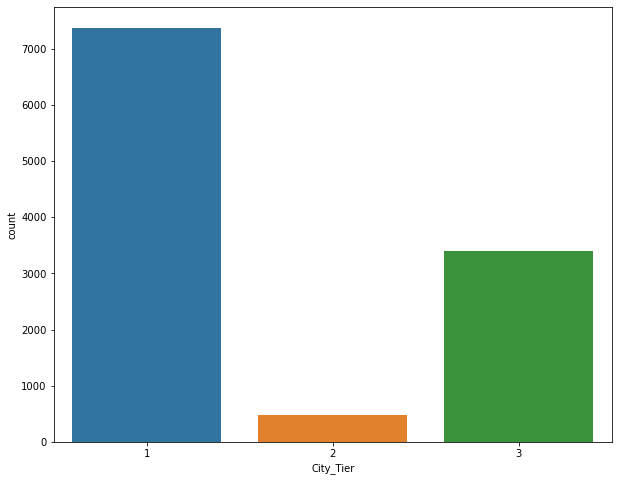

In [164]:
plt.figure(figsize=(10,8))
sns.countplot(x='City_Tier',data=df)
plt.show();

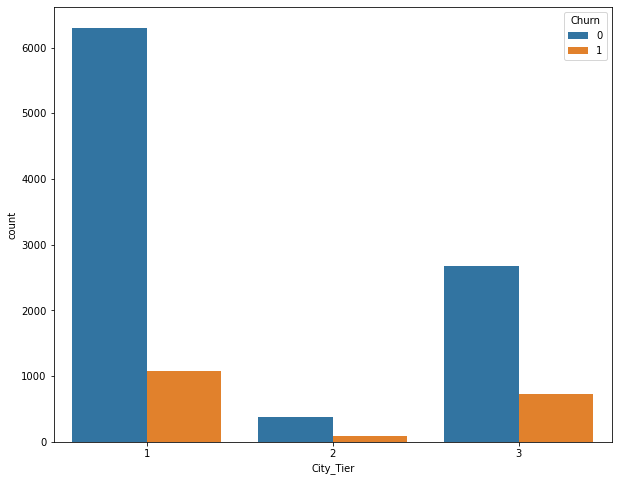

In [165]:
plt.figure(figsize=(10,8))
sns.countplot(x='City_Tier',hue='Churn',data=df)
plt.show();

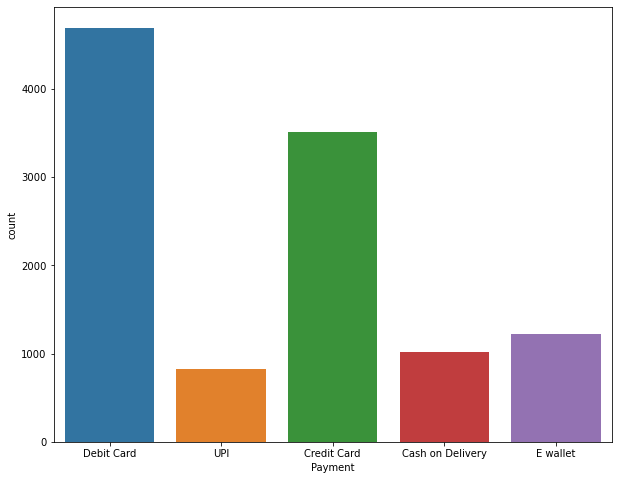

In [166]:
plt.figure(figsize=(10,8))
sns.countplot(x='Payment',data=df)
plt.show();

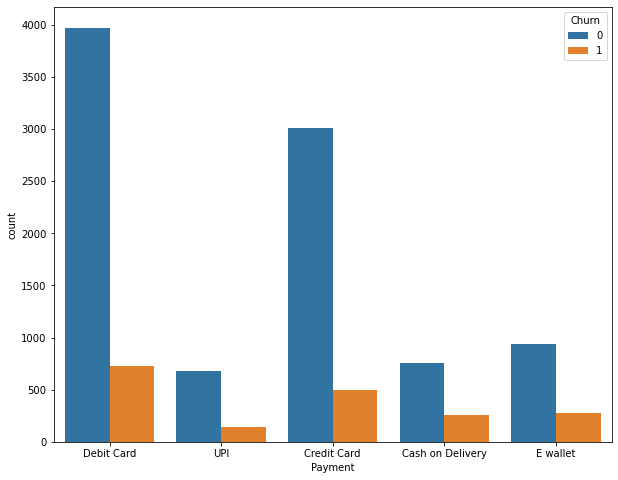

In [167]:
plt.figure(figsize=(10,8))
sns.countplot(x='Payment',hue='Churn',data=df)
plt.show();

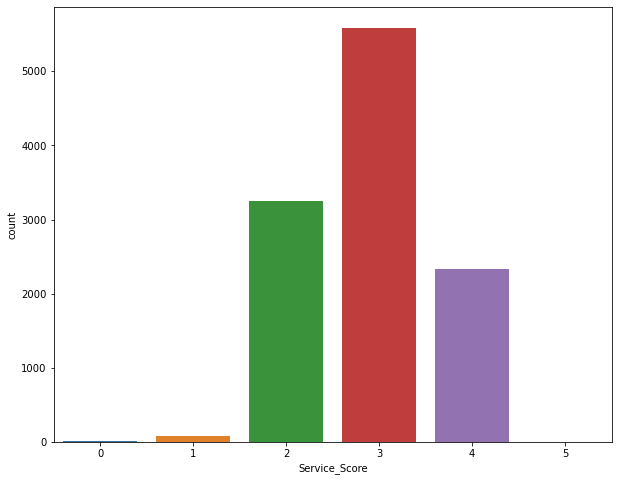

In [168]:
plt.figure(figsize=(10,8))
sns.countplot(x='Service_Score',data=df)
plt.show();

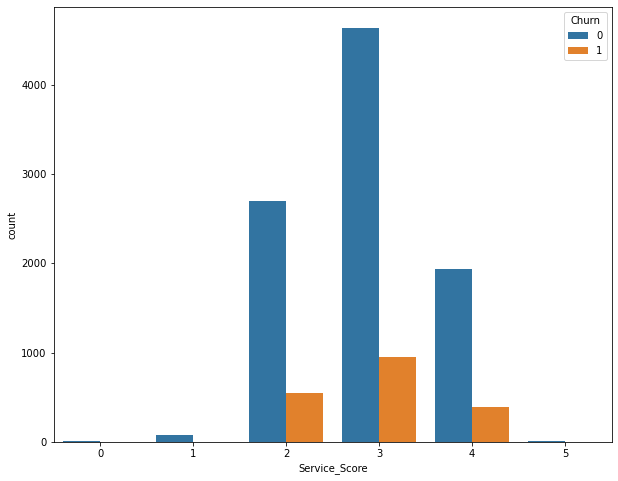

In [169]:
plt.figure(figsize=(10,8))
sns.countplot(x='Service_Score',hue='Churn',data=df)
plt.show();

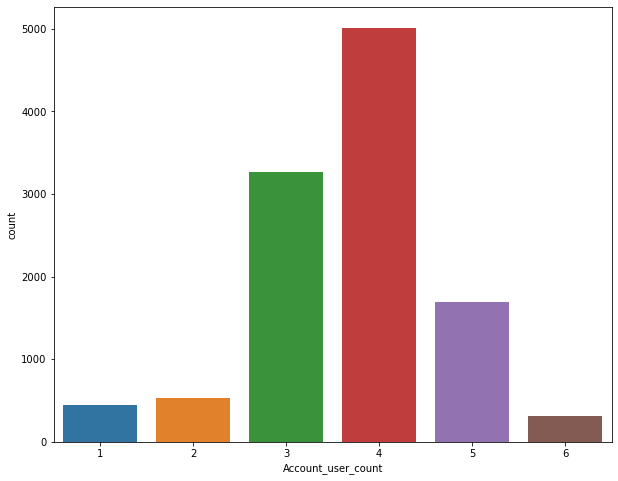

In [170]:
plt.figure(figsize=(10,8))
sns.countplot(x='Account_user_count',data=df)
plt.show();

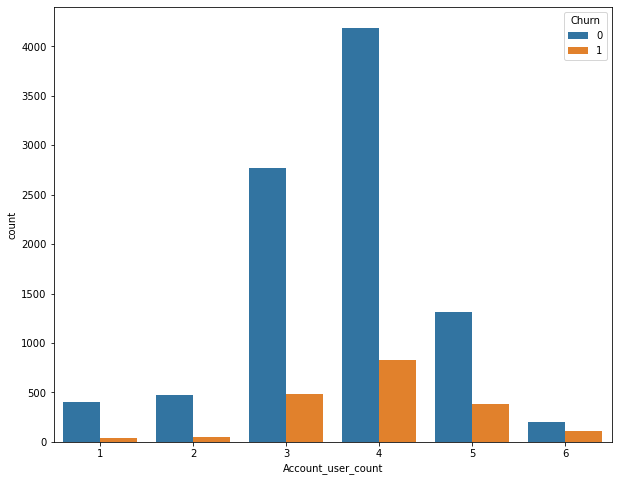

In [171]:
plt.figure(figsize=(10,8))
sns.countplot(x='Account_user_count',hue='Churn',data=df)
plt.show();

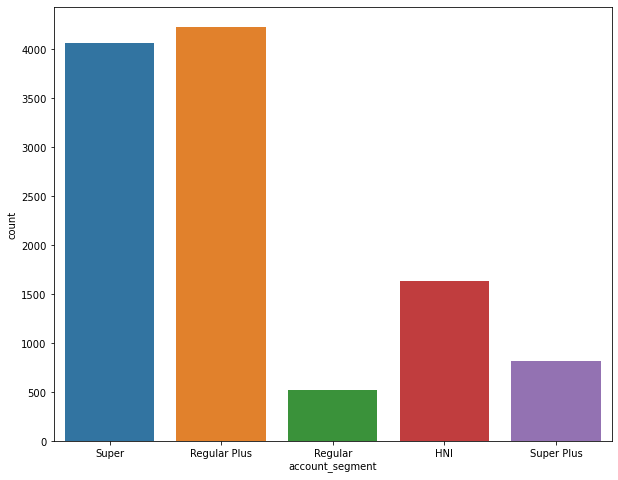

In [172]:
plt.figure(figsize=(10,8))
sns.countplot(x='account_segment',data=df)
plt.show();

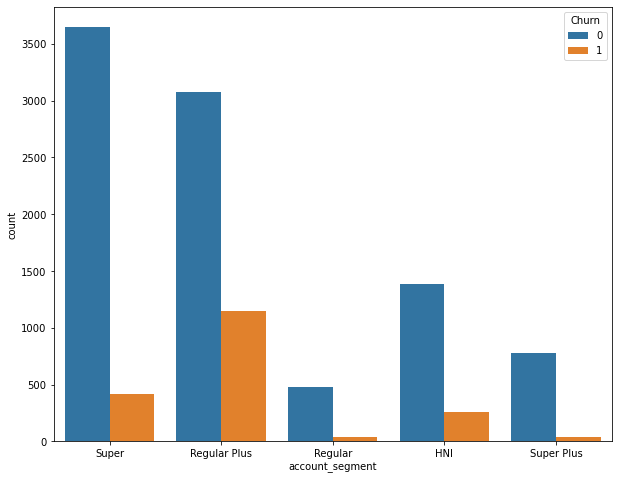

In [173]:
plt.figure(figsize=(10,8))
sns.countplot(x='account_segment',hue='Churn',data=df)
plt.show();

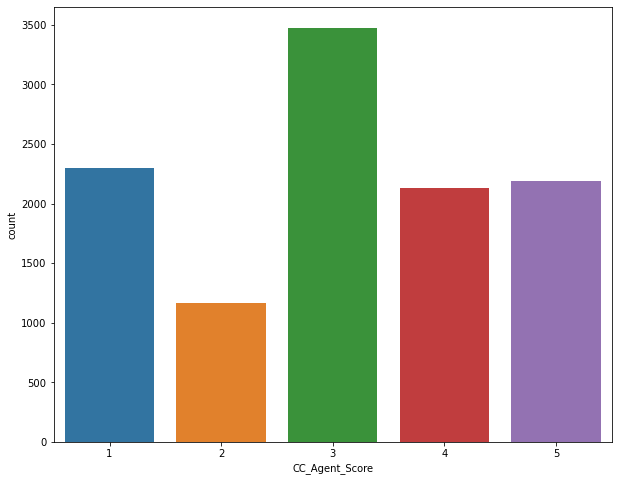

In [174]:
plt.figure(figsize=(10,8))
sns.countplot(x='CC_Agent_Score',data=df)
plt.show();

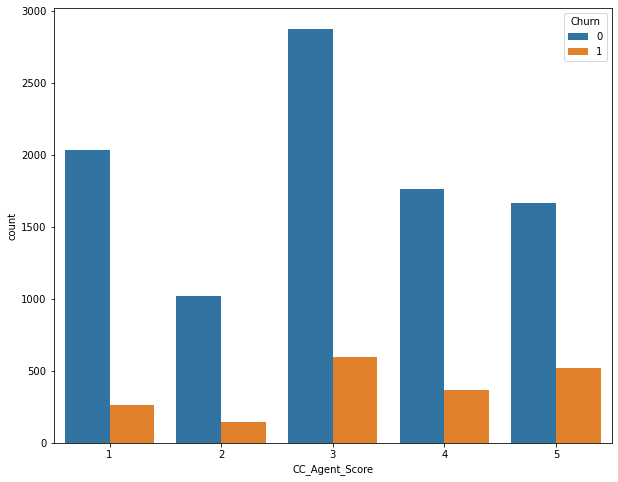

In [175]:
plt.figure(figsize=(10,8))
sns.countplot(x='CC_Agent_Score',hue='Churn',data=df)
plt.show();

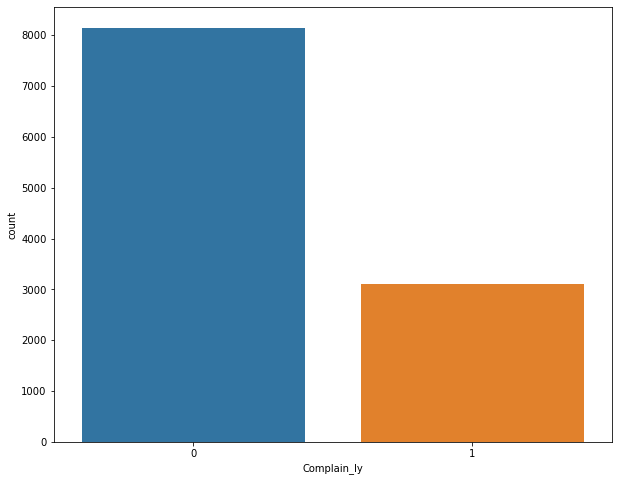

In [176]:
plt.figure(figsize=(10,8))
sns.countplot(x='Complain_ly',data=df)
plt.show();

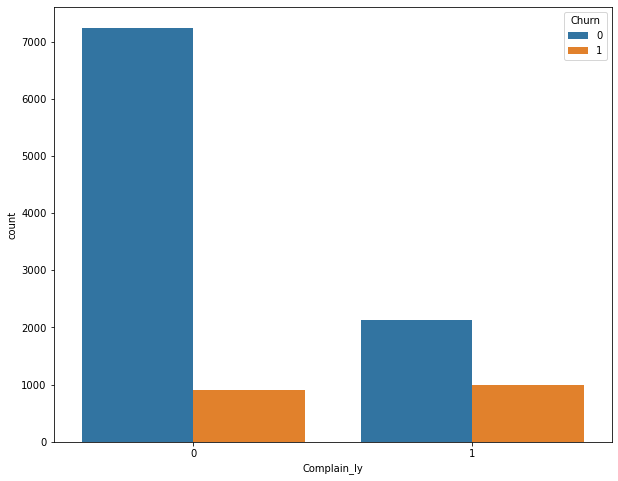

In [177]:
plt.figure(figsize=(10,8))
sns.countplot(x='Complain_ly',hue='Churn',data=df)
plt.show();

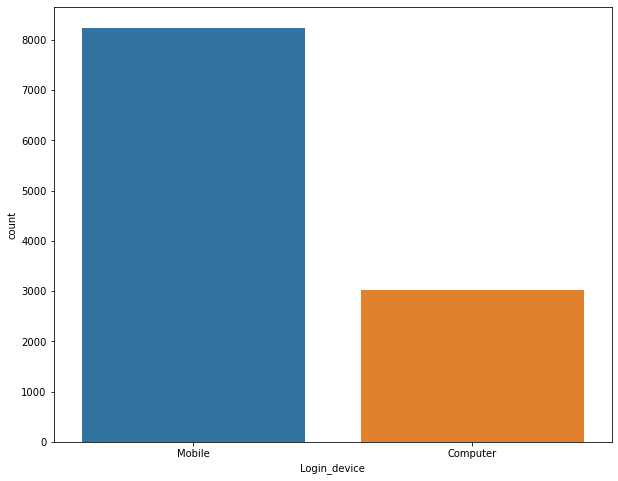

In [178]:
plt.figure(figsize=(10,8))
sns.countplot(x='Login_device',data=df)
plt.show();

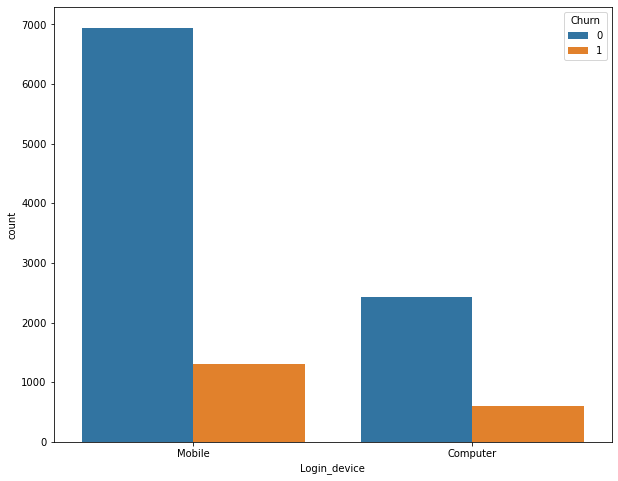

In [179]:
plt.figure(figsize=(10,8))
sns.countplot(x='Login_device',hue='Churn',data=df)
plt.show();

In [180]:
# MULTIVARIATE ANALYSIS

<Figure size 720x576 with 0 Axes>

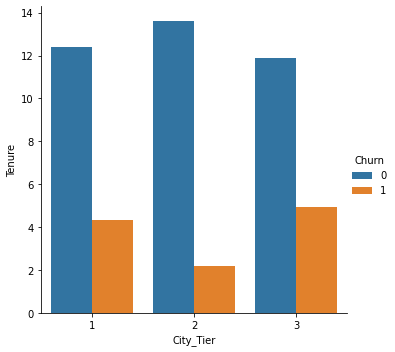

In [181]:
plt.figure(figsize=(10,8))
sns.catplot(x="City_Tier", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

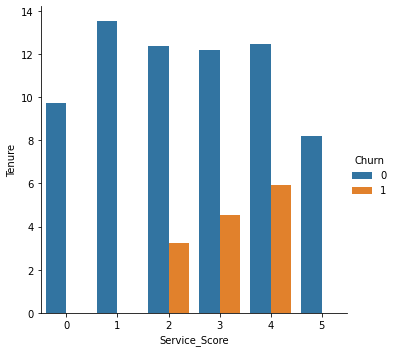

In [182]:
plt.figure(figsize=(10,8))
sns.catplot(x="Service_Score", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

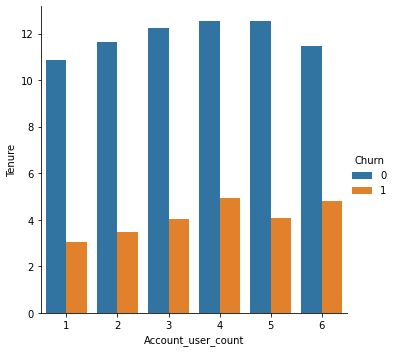

In [183]:
plt.figure(figsize = (10,8))
sns.catplot(x="Account_user_count", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

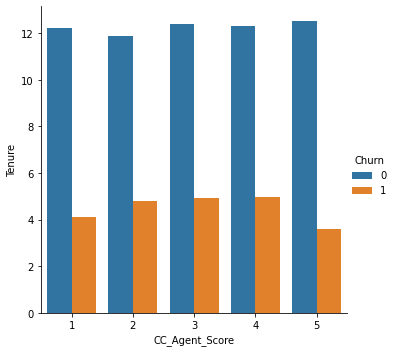

In [184]:
plt.figure(figsize = (10,8))
sns.catplot(x="CC_Agent_Score", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

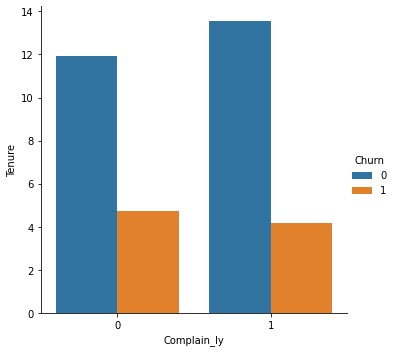

In [185]:
plt.figure(figsize = (10,8))
sns.catplot(x="Complain_ly", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

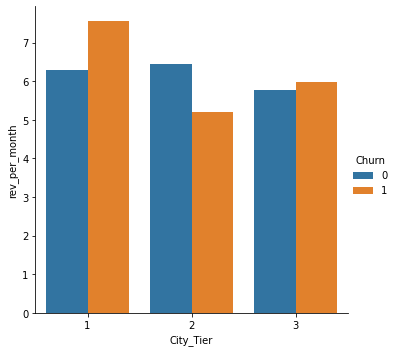

In [186]:
plt.figure(figsize = (10,8))
sns.catplot(x="City_Tier", y="rev_per_month", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

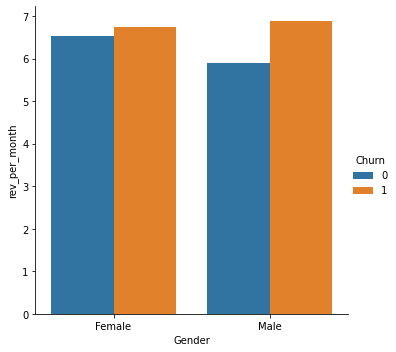

In [187]:
plt.figure(figsize = (10,8))
sns.catplot(x="Gender", y="rev_per_month", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

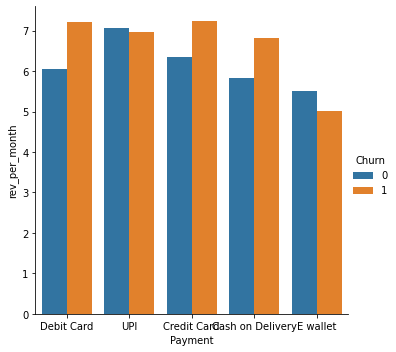

In [188]:
plt.figure(figsize = (10,8))
sns.catplot(x="Payment", y="rev_per_month", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

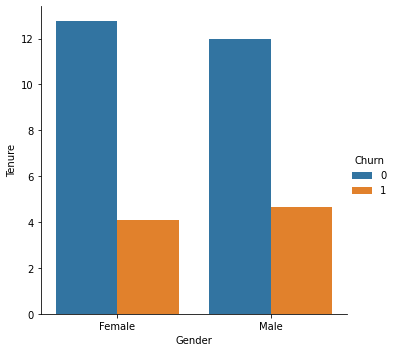

In [189]:
plt.figure(figsize = (10,8))
sns.catplot(x="Gender", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

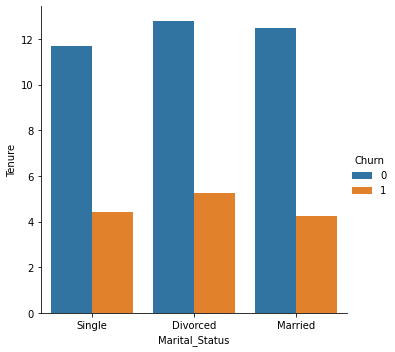

In [190]:
plt.figure(figsize = (10,8))
sns.catplot(x="Marital_Status", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

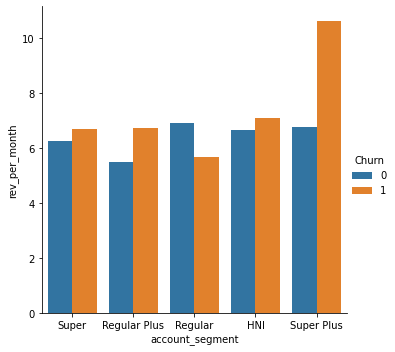

In [191]:
plt.figure(figsize = (10,8))
sns.catplot(x="account_segment", y="rev_per_month", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

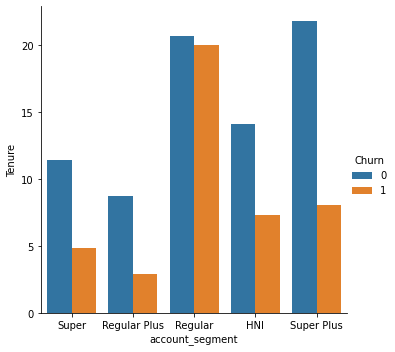

In [192]:
plt.figure(figsize = (10,8))
sns.catplot(x="account_segment", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

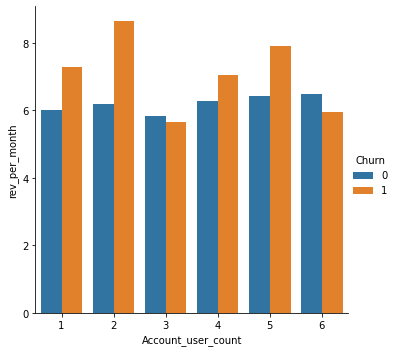

In [193]:
plt.figure(figsize = (10,8))
sns.catplot(x="Account_user_count", y="rev_per_month", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

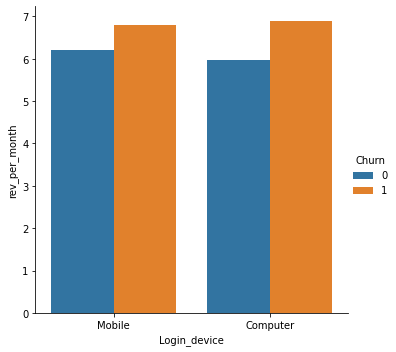

In [194]:
plt.figure(figsize = (10,8))
sns.catplot(x="Login_device", y="rev_per_month", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

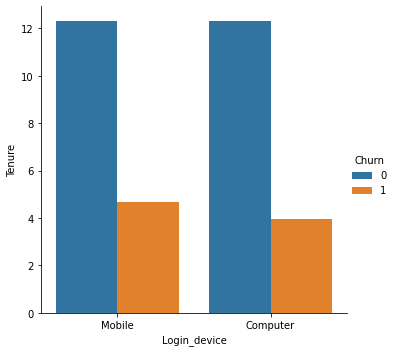

In [195]:
plt.figure(figsize = (10,8))
sns.catplot(x="Login_device", y="Tenure", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

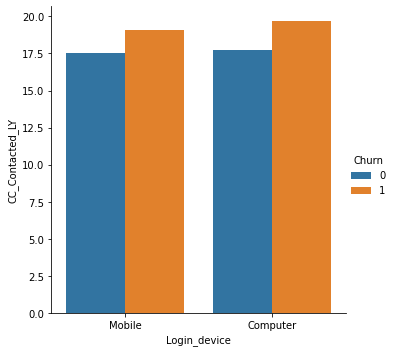

In [196]:
plt.figure(figsize = (10,8))
sns.catplot(x="Login_device", y="CC_Contacted_LY", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

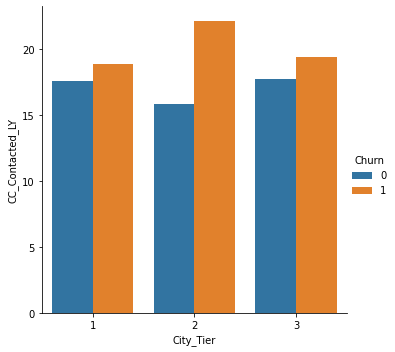

In [197]:
plt.figure(figsize = (10,8))
sns.catplot(x="City_Tier", y="CC_Contacted_LY", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

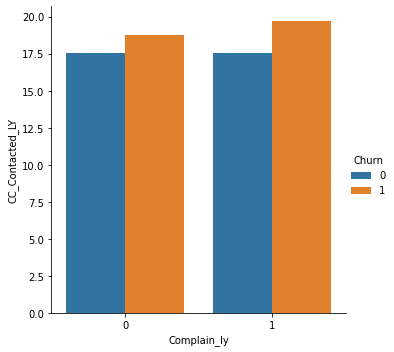

In [198]:
plt.figure(figsize = (10,8))
sns.catplot(x="Complain_ly", y="CC_Contacted_LY", hue ="Churn", kind="bar", ci=None, data=df)
plt.show();

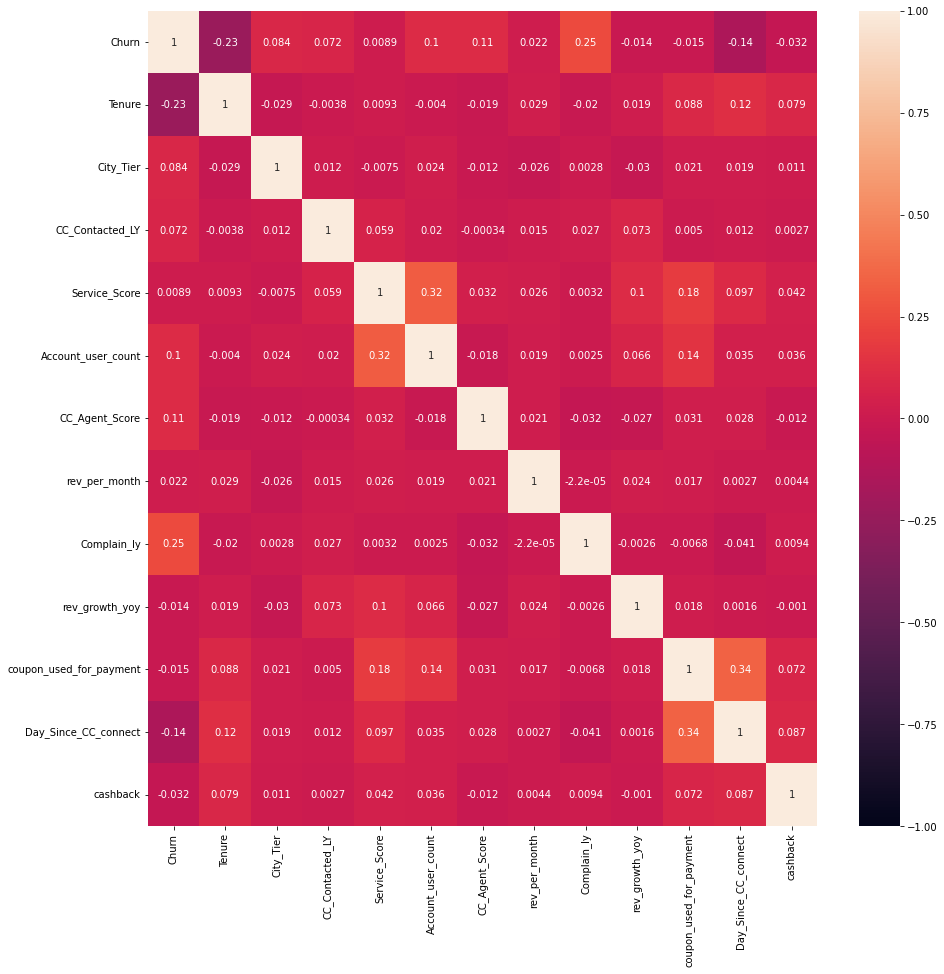

In [199]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

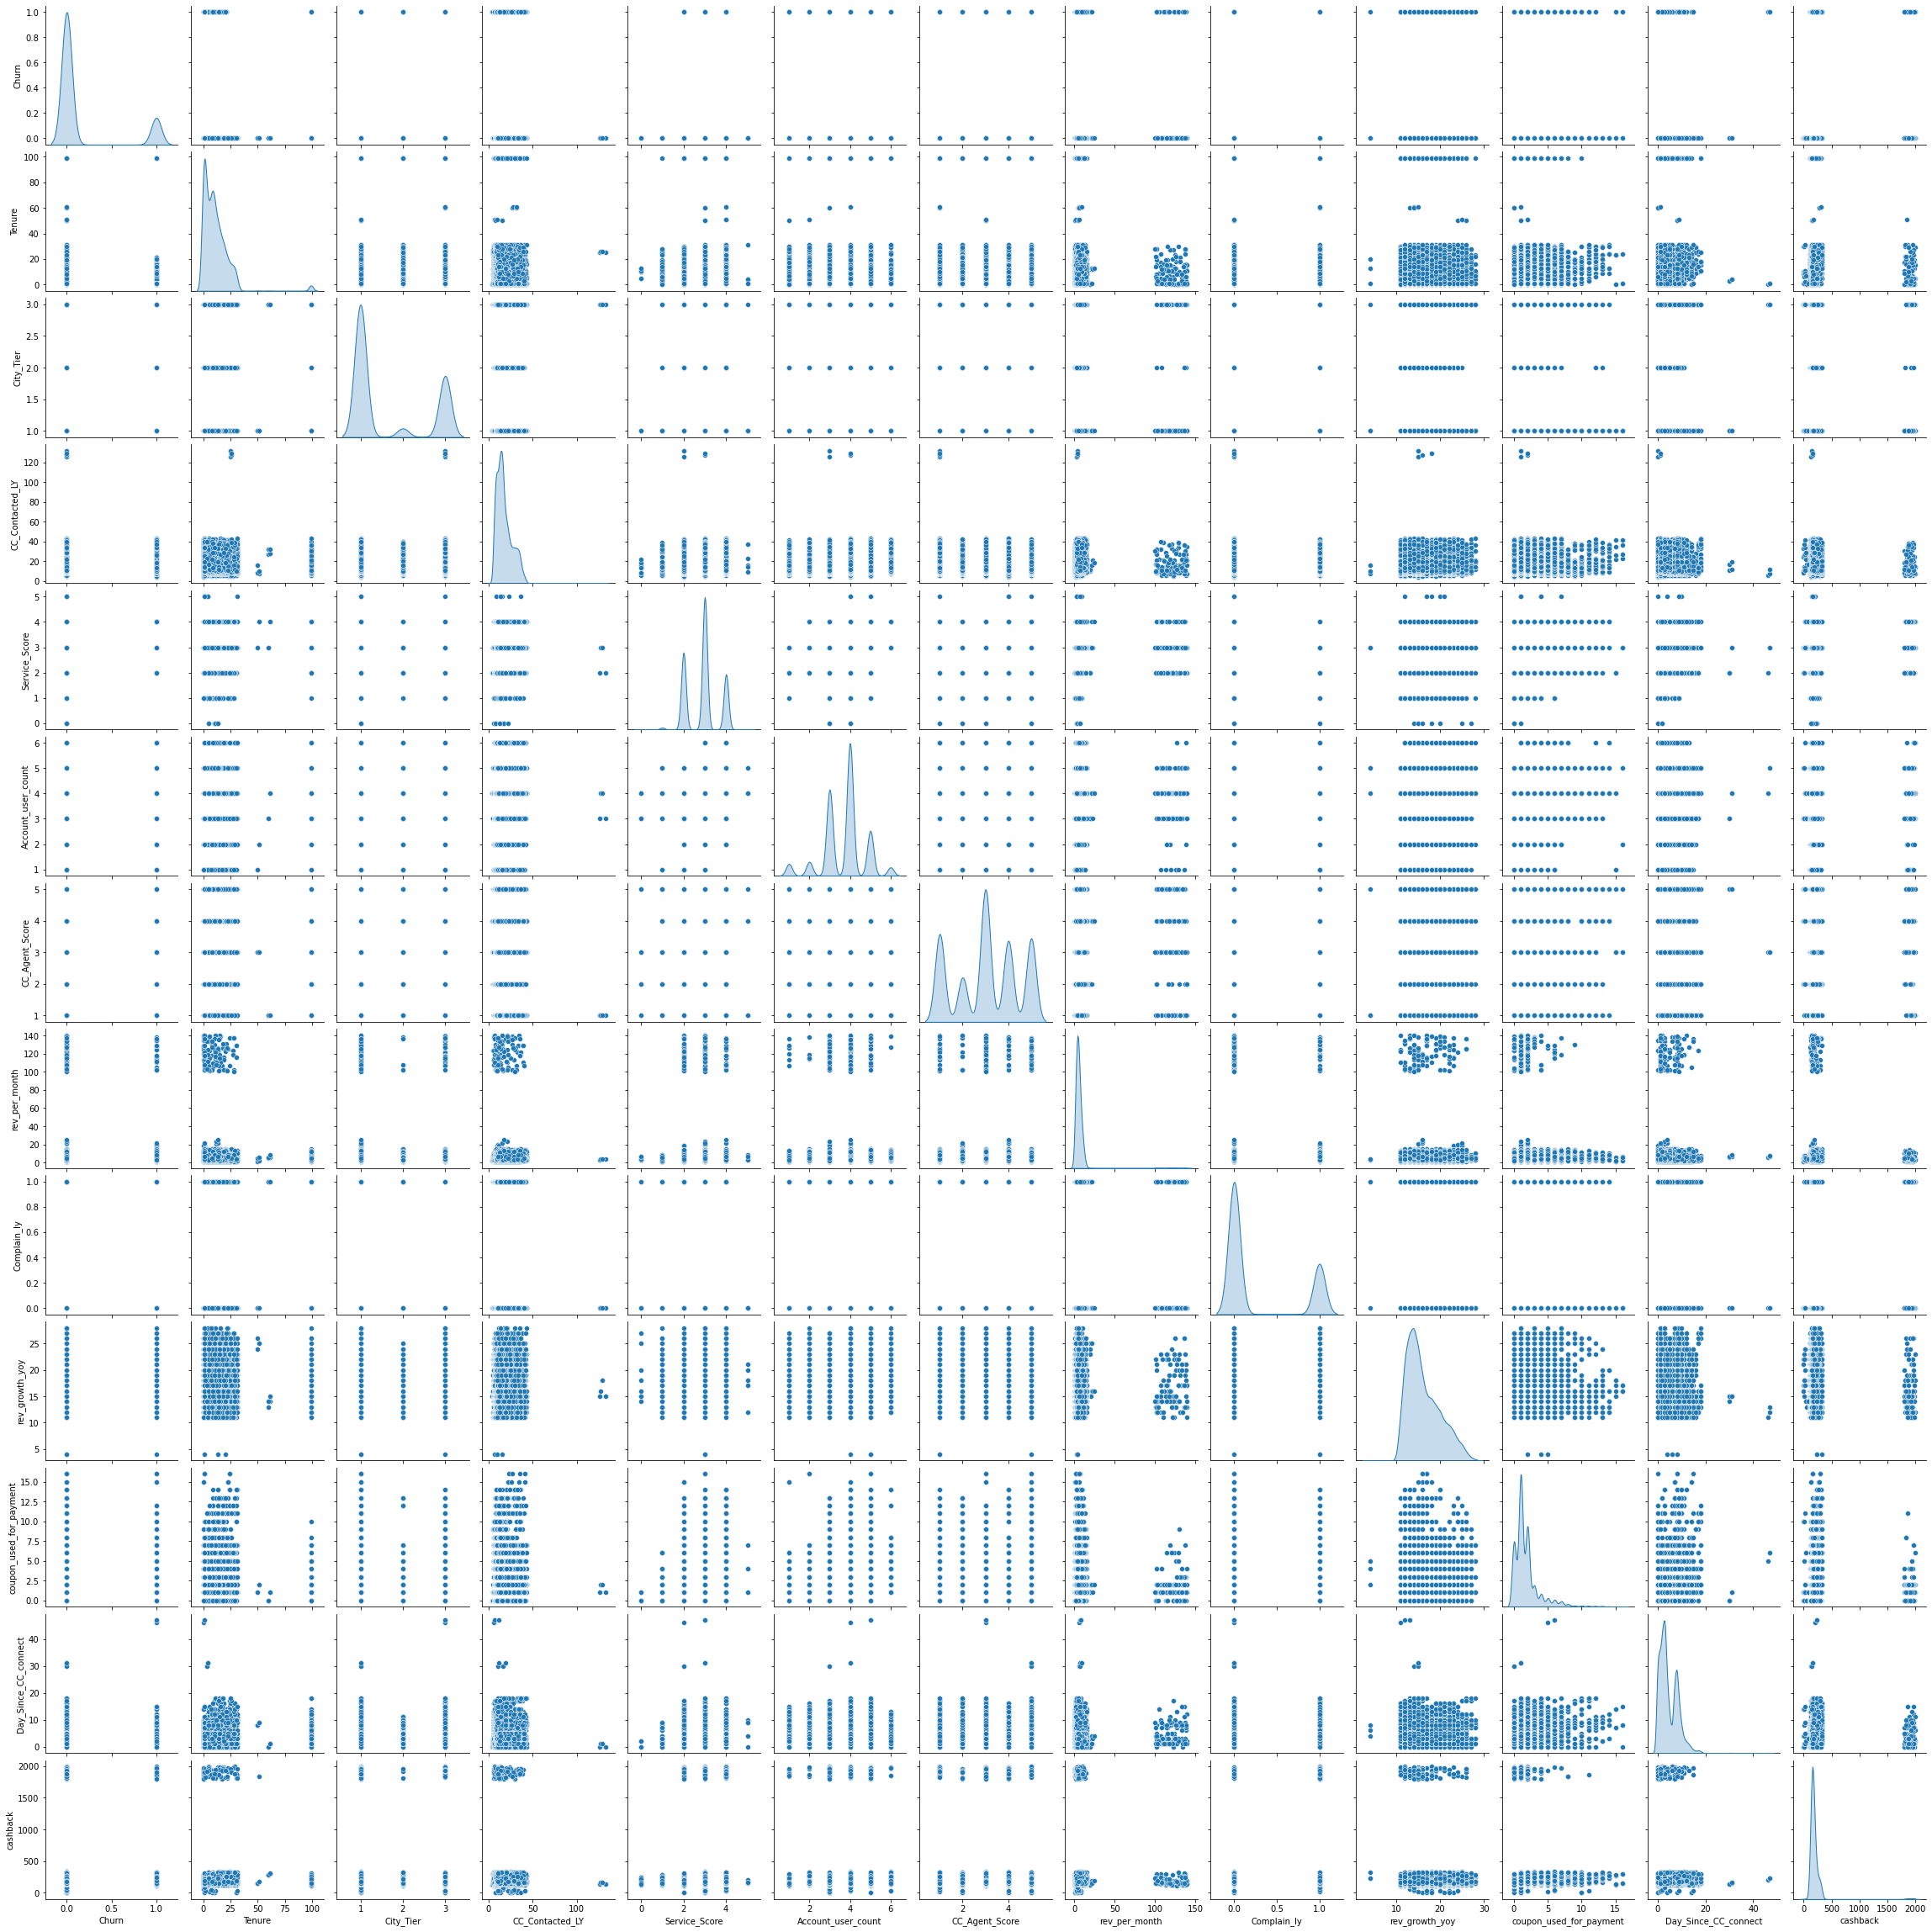

In [200]:
sns.pairplot(data=df, diag_kind='kde')
plt.show()

In [201]:
# ENCODING THE CATEGORICAL VARIABLES

In [202]:
df_cat = df[['Payment','Gender','account_segment','Marital_Status','Login_device']]

In [203]:
dfnew = pd.get_dummies(data=df_cat,drop_first=True)

In [204]:
dfnew.head()

,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,0,1,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,1,0,1,0,0,0,1,1
2,0,1,0,0,1,0,1,0,0,0,1,1
3,0,1,0,0,1,0,0,1,0,0,1,1
4,1,0,0,0,1,0,1,0,0,0,1,1


In [205]:
dfnew.shape

(11260, 12)

In [206]:
df = pd.concat([df, dfnew], axis=1)

In [207]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1,4.0,3,6.0,Debit Card,Female,3,3,Super,2,Single,9.0,1,11.0,1.0,5.0,159.93,Mobile,0,1,0,0,0,0,0,1,0,0,1,1
1,1,0.0,1,8.0,UPI,Male,3,4,Regular Plus,3,Single,7.0,1,15.0,0.0,0.0,120.90,Mobile,0,0,0,1,1,0,1,0,0,0,1,1
2,1,0.0,1,30.0,Debit Card,Male,2,4,Regular Plus,3,Single,6.0,1,14.0,0.0,3.0,165.25,Mobile,0,1,0,0,1,0,1,0,0,0,1,1
3,1,0.0,3,15.0,Debit Card,Male,2,4,Super,5,Single,8.0,0,23.0,0.0,3.0,134.07,Mobile,0,1,0,0,1,0,0,1,0,0,1,1
4,1,0.0,1,12.0,Credit Card,Male,2,3,Regular Plus,5,Single,3.0,0,11.0,1.0,3.0,129.60,Mobile,1,0,0,0,1,0,1,0,0,0,1,1


In [208]:
df.shape

(11260, 30)

In [209]:
df = df.drop(['Payment','Gender','account_segment','Marital_Status','Login_device'], axis=1)

In [210]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1,4.0,3,6.0,3,3,2,9.0,1,11.0,1.0,5.0,159.93,0,1,0,0,0,0,0,1,0,0,1,1
1,1,0.0,1,8.0,3,4,3,7.0,1,15.0,0.0,0.0,120.90,0,0,0,1,1,0,1,0,0,0,1,1
2,1,0.0,1,30.0,2,4,3,6.0,1,14.0,0.0,3.0,165.25,0,1,0,0,1,0,1,0,0,0,1,1
3,1,0.0,3,15.0,2,4,5,8.0,0,23.0,0.0,3.0,134.07,0,1,0,0,1,0,0,1,0,0,1,1
4,1,0.0,1,12.0,2,3,5,3.0,0,11.0,1.0,3.0,129.60,1,0,0,0,1,0,1,0,0,0,1,1


In [211]:
df.shape

(11260, 25)

### SCALING

In [212]:
dfscale=df[['Tenure','City_Tier','CC_Contacted_LY','Service_Score','Account_user_count','CC_Agent_Score','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']]

In [213]:
dfnoscale = pd.concat([df[['Churn','Complain_ly']], dfnew], axis=1)

In [214]:
dfnoscale.head()

,Churn,Complain_ly,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1,1,0,1,0,0,0,0,0,1,0,0,1,1
1,1,1,0,0,0,1,1,0,1,0,0,0,1,1
2,1,1,0,1,0,0,1,0,1,0,0,0,1,1
3,1,0,0,1,0,0,1,0,0,1,0,0,1,1
4,1,0,1,0,0,0,1,0,1,0,0,0,1,1


In [215]:
from sklearn.preprocessing import MinMaxScaler

In [216]:
minmax=MinMaxScaler()

In [217]:
df_scaled = minmax.fit_transform(dfscale)
df_scaled

array([[0.04040404, 1.        , 0.015625  , ..., 0.0625    , 0.10638298,
        0.08008513],
       [0.        , 0.        , 0.03125   , ..., 0.        , 0.        ,
        0.06054081],
       [0.        , 0.        , 0.203125  , ..., 0.        , 0.06382979,
        0.08274912],
       ...,
       [0.01010101, 0.        , 0.078125  , ..., 0.0625    , 0.08510638,
        0.09585378],
       [0.23232323, 1.        , 0.0546875 , ..., 0.125     , 0.19148936,
        0.09008513],
       [0.08080808, 0.        , 0.140625  , ..., 0.125     , 0.06382979,
        0.08765148]])

In [218]:
df_scaled = pd.DataFrame(df_scaled, index=dfscale.index, columns=dfscale.columns)
df_scaled.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,0.040404,1.0,0.015625,0.6,0.4,0.25,0.057554,0.291667,0.0625,0.106383,0.080085
1,0.000000,0.0,0.031250,0.6,0.6,0.50,0.043165,0.458333,0.0000,0.000000,0.060541
2,0.000000,0.0,0.203125,0.4,0.6,0.50,0.035971,0.416667,0.0000,0.063830,0.082749
3,0.000000,1.0,0.085938,0.4,0.6,1.00,0.050360,0.791667,0.0000,0.063830,0.067136
4,0.000000,0.0,0.062500,0.4,0.4,1.00,0.014388,0.291667,0.0625,0.063830,0.064897


In [219]:
df_scaled = pd.concat([df_scaled, dfnoscale], axis=1)

In [220]:
df_scaled.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Churn,Complain_ly,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,0.040404,1.0,0.015625,0.6,0.4,0.25,0.057554,0.291667,0.0625,0.106383,0.080085,1,1,0,1,0,0,0,0,0,1,0,0,1,1
1,0.000000,0.0,0.031250,0.6,0.6,0.50,0.043165,0.458333,0.0000,0.000000,0.060541,1,1,0,0,0,1,1,0,1,0,0,0,1,1
2,0.000000,0.0,0.203125,0.4,0.6,0.50,0.035971,0.416667,0.0000,0.063830,0.082749,1,1,0,1,0,0,1,0,1,0,0,0,1,1
3,0.000000,1.0,0.085938,0.4,0.6,1.00,0.050360,0.791667,0.0000,0.063830,0.067136,1,0,0,1,0,0,1,0,0,1,0,0,1,1
4,0.000000,0.0,0.062500,0.4,0.4,1.00,0.014388,0.291667,0.0625,0.063830,0.064897,1,0,1,0,0,0,1,0,1,0,0,0,1,1


In [221]:
# CLUSTERING - K MEANS CLUSTERING / K PROTOTYPE CLUSTERING

### MODEL BUILDING

In [222]:
# WE WOULD BE DROPPING DISCRIMINATORY VARIABLES LIKE GENDER AND MARITAL STATUS FROM FURTHER ANALYSIS

In [223]:
df_final = df_scaled.drop(['Gender_Male','Marital_Status_Married','Marital_Status_Single'], axis=1)

In [224]:
df_final.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Churn,Complain_ly,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Login_device_Mobile
0,0.040404,1.0,0.015625,0.6,0.4,0.25,0.057554,0.291667,0.0625,0.106383,0.080085,1,1,0,1,0,0,0,0,1,0,1
1,0.000000,0.0,0.031250,0.6,0.6,0.50,0.043165,0.458333,0.0000,0.000000,0.060541,1,1,0,0,0,1,0,1,0,0,1
2,0.000000,0.0,0.203125,0.4,0.6,0.50,0.035971,0.416667,0.0000,0.063830,0.082749,1,1,0,1,0,0,0,1,0,0,1
3,0.000000,1.0,0.085938,0.4,0.6,1.00,0.050360,0.791667,0.0000,0.063830,0.067136,1,0,0,1,0,0,0,0,1,0,1
4,0.000000,0.0,0.062500,0.4,0.4,1.00,0.014388,0.291667,0.0625,0.063830,0.064897,1,0,1,0,0,0,0,1,0,0,1


In [234]:
df_final.shape

(11260, 22)

#### MODEL 1 - DECISION TREES

In [235]:
# decision trees do not require scaling so we will use the non scaled data

In [236]:
df_final_ns = df.drop(['Gender_Male','Marital_Status_Married','Marital_Status_Single'], axis=1)

In [237]:
df_final_ns.shape

(11260, 22)

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [239]:
# Data Split: Split the data into test and train

In [240]:
X = df_final_ns.drop("Churn", axis=1)

y = df_final_ns.pop("Churn")

In [241]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=42)

### SMOTE

In [242]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, train_labels = sm.fit_resample(X_train, train_labels)

In [243]:
X_train.shape

(13150, 21)

In [244]:
train_labels.value_counts()

0    6575
1    6575
Name: Churn, dtype: int64

#### MODEL 1A

In [245]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=42)

In [246]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=42)

In [250]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [251]:
# Feature importance

In [252]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                   Imp
Tenure                        0.415316
rev_per_month                 0.068439
cashback                      0.065920
Day_Since_CC_connect          0.051174
CC_Contacted_LY               0.048141
rev_growth_yoy                0.043311
CC_Agent_Score                0.040313
Payment_Credit Card           0.035392
Login_device_Mobile           0.028074
Account_user_count            0.027481
coupon_used_for_payment       0.026660
account_segment_Super         0.026355
Payment_Debit Card            0.026220
Complain_ly                   0.023086
Payment_UPI                   0.022546
Payment_E wallet              0.017426
City_Tier                     0.014106
Service_Score                 0.013605
account_segment_Regular Plus  0.003840
account_segment_Regular       0.001807
account_segment_Super Plus    0.000788


In [253]:
confusion_matrix(train_labels,ytrain_predict)

array([[6575,    0],
       [   0, 6575]], dtype=int64)

In [254]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6575
           1       1.00      1.00      1.00      6575

    accuracy                           1.00     13150
   macro avg       1.00      1.00      1.00     13150
weighted avg       1.00      1.00      1.00     13150



In [255]:
confusion_matrix(test_labels,ytest_predict)

array([[2600,  189],
       [ 128,  461]], dtype=int64)

In [256]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2789
           1       0.71      0.78      0.74       589

    accuracy                           0.91      3378
   macro avg       0.83      0.86      0.84      3378
weighted avg       0.91      0.91      0.91      3378



#### MODEL 1B

In [258]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [5,7],
    'max_depth': [7,10],
    'min_samples_leaf': [40,50,70],
    'min_samples_split': [100,150,200]
}

dtc1 = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = dtc1, param_grid = param_grid, cv = 10)

In [259]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [7, 10], 'max_features': [5, 7],
                         'min_samples_leaf': [40, 50, 70],
                         'min_samples_split': [100, 150, 200]})

In [260]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 40,
 'min_samples_split': 100}

In [261]:
best_grid = grid_search.best_estimator_

In [262]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [263]:
confusion_matrix(train_labels,ytrain_predict)

array([[5402, 1173],
       [ 872, 5703]], dtype=int64)

In [264]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6575
           1       0.83      0.87      0.85      6575

    accuracy                           0.84     13150
   macro avg       0.85      0.84      0.84     13150
weighted avg       0.85      0.84      0.84     13150



In [265]:
confusion_matrix(test_labels,ytest_predict)

array([[2247,  542],
       [ 169,  420]], dtype=int64)

In [266]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2789
           1       0.44      0.71      0.54       589

    accuracy                           0.79      3378
   macro avg       0.68      0.76      0.70      3378
weighted avg       0.84      0.79      0.81      3378



AUC: 0.926


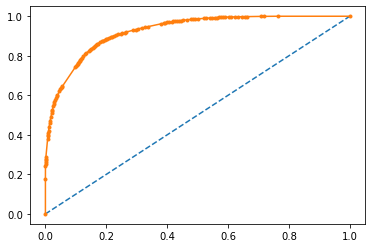

In [267]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.852


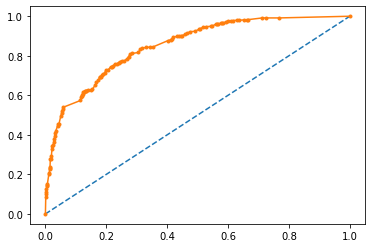

In [268]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### MODEL 1C

In [269]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [5,7,10],
    'max_depth': [8,10],
    'min_samples_leaf': [40,50,70],
    'min_samples_split': [150,200,300]
}

dtc2 = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = dtc2, param_grid = param_grid, cv = 10)

In [270]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [8, 10], 'max_features': [5, 7, 10],
                         'min_samples_leaf': [40, 50, 70],
                         'min_samples_split': [150, 200, 300]})

In [271]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 200}

In [272]:
best_grid = grid_search.best_estimator_

In [273]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [274]:
confusion_matrix(train_labels,ytrain_predict)

array([[5620,  955],
       [ 912, 5663]], dtype=int64)

In [275]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      6575
           1       0.86      0.86      0.86      6575

    accuracy                           0.86     13150
   macro avg       0.86      0.86      0.86     13150
weighted avg       0.86      0.86      0.86     13150



In [276]:
confusion_matrix(test_labels,ytest_predict)

array([[2340,  449],
       [ 162,  427]], dtype=int64)

In [277]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      2789
           1       0.49      0.72      0.58       589

    accuracy                           0.82      3378
   macro avg       0.71      0.78      0.73      3378
weighted avg       0.86      0.82      0.83      3378



AUC: 0.941


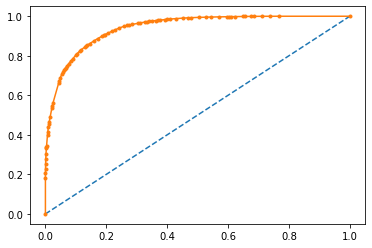

In [278]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.879


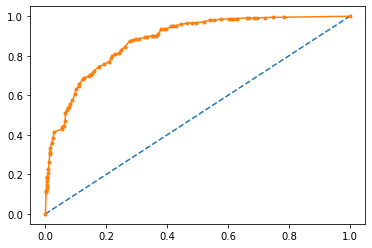

In [279]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### MODEL 2A - RANDOM FOREST

In [281]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl1 = RandomForestClassifier(n_estimators = 100,max_features=10,random_state=42)
rfcl1 = rfcl1.fit(X_train, train_labels)

In [282]:
ytrain_predict = rfcl1.predict(X_train)
ytest_predict = rfcl1.predict(X_test)

In [283]:
confusion_matrix(train_labels,ytrain_predict)

array([[6575,    0],
       [   0, 6575]], dtype=int64)

In [284]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6575
           1       1.00      1.00      1.00      6575

    accuracy                           1.00     13150
   macro avg       1.00      1.00      1.00     13150
weighted avg       1.00      1.00      1.00     13150



In [285]:
confusion_matrix(test_labels,ytest_predict)

array([[2711,   78],
       [  89,  500]], dtype=int64)

In [286]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2789
           1       0.87      0.85      0.86       589

    accuracy                           0.95      3378
   macro avg       0.92      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



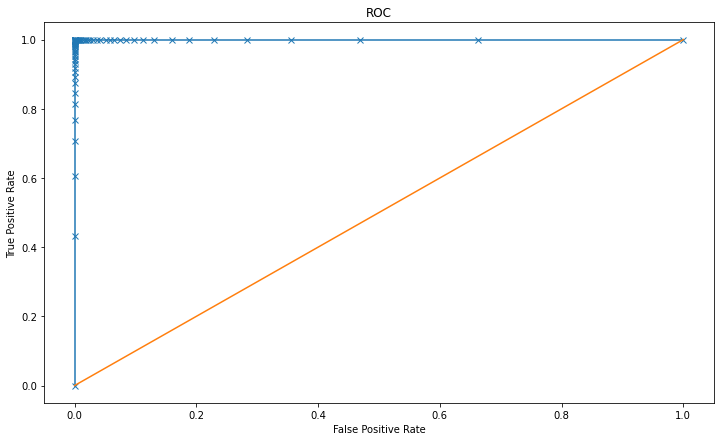

Area under Curve is 0.9999999999999999


In [287]:
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl1.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl1.predict_proba(X_train)[:,1]))

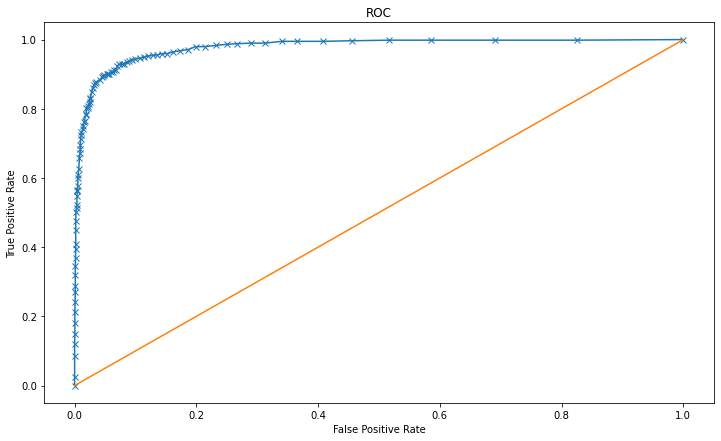

Area under Curve is 0.9779588256313763


In [288]:
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl1.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl1.predict_proba(X_test)[:,1]))

#### MODEL 2B

In [290]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7,10],
    'max_features': [5,7],
    'min_samples_leaf': [40,50,70],
    'min_samples_split': [100,150,200],
    'n_estimators': [100,200]
}

rfcl2 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfcl2, param_grid = param_grid, cv = 10)

In [291]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [7, 10], 'max_features': [5, 7],
                         'min_samples_leaf': [40, 50, 70],
                         'min_samples_split': [100, 150, 200],
                         'n_estimators': [100, 200]})

In [292]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 200}

In [293]:
best_grid = grid_search.best_estimator_

In [294]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [295]:
confusion_matrix(train_labels,ytrain_predict)

array([[5924,  651],
       [ 721, 5854]], dtype=int64)

In [296]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6575
           1       0.90      0.89      0.90      6575

    accuracy                           0.90     13150
   macro avg       0.90      0.90      0.90     13150
weighted avg       0.90      0.90      0.90     13150



In [297]:
confusion_matrix(test_labels,ytest_predict)

array([[2511,  278],
       [ 167,  422]], dtype=int64)

In [298]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2789
           1       0.60      0.72      0.65       589

    accuracy                           0.87      3378
   macro avg       0.77      0.81      0.79      3378
weighted avg       0.88      0.87      0.87      3378



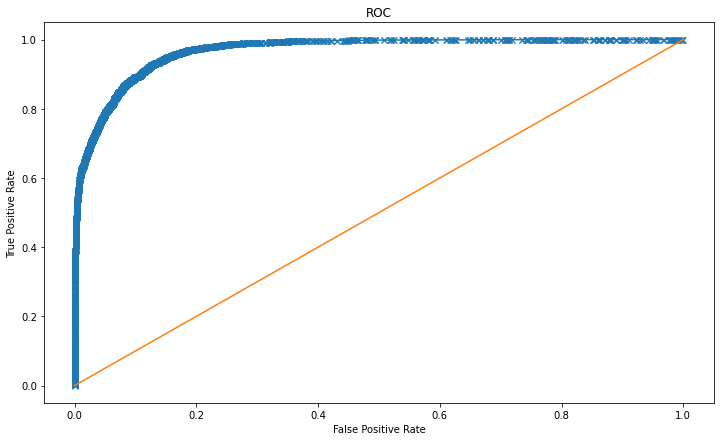

Area under Curve is 0.9670866428602409


In [300]:
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

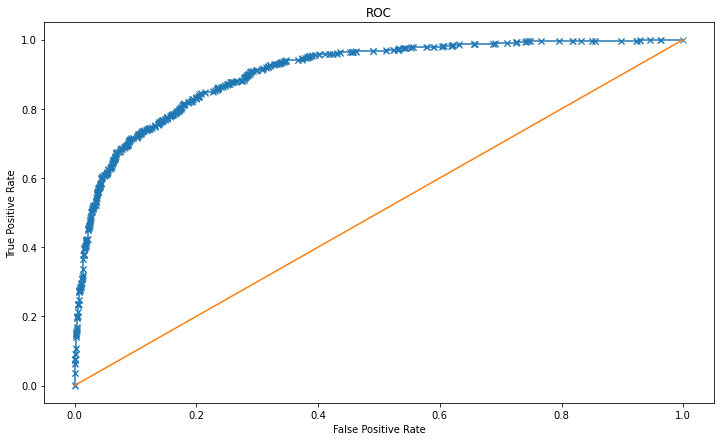

Area under Curve is 0.9046289662091127


In [301]:
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

#### MODEL 2C

In [302]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [5,10],
    'min_samples_leaf': [40,50,60],
    'min_samples_split': [100,150,200],
    'n_estimators': [150,200]
}

rfcl3 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfcl3, param_grid = param_grid, cv = 10)

In [303]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [7, 10], 'max_features': [5, 10],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [100, 150, 200],
                         'n_estimators': [150, 200]})

In [304]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 200}

In [305]:
best_grid = grid_search.best_estimator_

In [306]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [307]:
confusion_matrix(train_labels,ytrain_predict)

array([[5924,  651],
       [ 721, 5854]], dtype=int64)

In [308]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6575
           1       0.90      0.89      0.90      6575

    accuracy                           0.90     13150
   macro avg       0.90      0.90      0.90     13150
weighted avg       0.90      0.90      0.90     13150



In [309]:
confusion_matrix(test_labels,ytest_predict)

array([[2511,  278],
       [ 167,  422]], dtype=int64)

In [310]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2789
           1       0.60      0.72      0.65       589

    accuracy                           0.87      3378
   macro avg       0.77      0.81      0.79      3378
weighted avg       0.88      0.87      0.87      3378

